In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 電玩銷售統計Video Game Sales

資料來自：Kaggle, https://www.kaggle.com/gregorut/videogamesales

In [2]:
df = pd.read_csv('C:/Users/koko/Downloads/vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


把非數字的資料用成'0'

In [3]:
import re
def format(x):
    value = re.compile(r'^\s*[-+]*[0-9]+\.*[0-9]*\s*$')
    if value.match(str(x)): #不是数字
        return x
    else:
        print('x2:>>>', str(x))
        return '0'
df['Global_Sales']=df['Global_Sales'].apply(format)
df['JP_Sales']=df['JP_Sales'].apply(format)

In [4]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# 比較日本電玩銷售與全球電玩銷售

想了解日本銷售量是否和全球銷量成一定關係

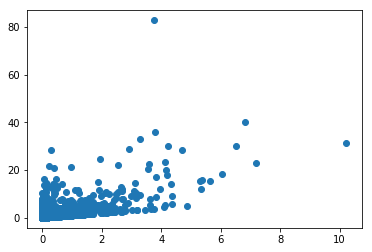

In [5]:
x= np.array(df['JP_Sales'])
y= np.array(df['Global_Sales'])
plt.scatter(x,y)

開始測試資料

In [6]:
X = x.reshape(len(x),1) #轉換 x

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

In [8]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.3 , random_state = 8787)

In [9]:
regr.fit(x_train, y_train) #訓練資料

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
Y_pred = regr.predict(x_test) #預測test資料

作圖

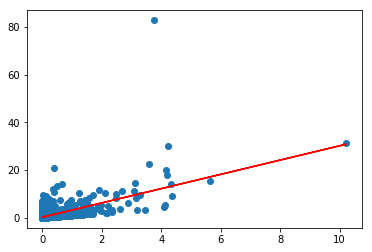

In [11]:
plt.scatter(x_test,y_test)
plt.plot(x_test,Y_pred,'r')